# Gráficos da economia brasileira

A visualização de dados é extremamente importante em apresentações e documentos, pois, além de quebrar a monotonia de um texto ou de uma fala extensa, torna a comunicação mais didática por meio de elementos visuais. Com isso em mente, decidi ajustar alguns parâmetros e configurações dos gráficos gerados com a biblioteca Matplotlib. Essas figuras foram utilizadas no Challenge Top Gestor 2024, organizado anualmente pelo Banco Safra. Os gráficos construídos representam os seguintes indicadores macroeconômicos: Selic Meta Anual, IPCA (12 meses) e IBC-Br. A fonte de dados utilizada foi extraída do Sistema Gerenciador de Séries Temporais (SGS) do Banco Central do Brasil.

 

## Importando as bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines

## Obtendo os dados economicos brasileiro

In [3]:
def obter_serie_bcb(codigo_serie, data_inicial, data_final):
    """
    Obtém dados de uma série temporal do Banco Central do Brasil.

    Parâmetros:
        codigo_serie (int): Código da série no Banco Central.
        data_inicial (str): Data inicial no formato 'DD/MM/AAAA'.
        data_final (str): Data final no formato 'DD/MM/AAAA'.

    Retorna:
        pd.DataFrame: Dados da série com o índice formatado como datetime.
    """
   
    url = (
        f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_serie}/dados'
        f'?formato=json&dataInicial={data_inicial}&dataFinal={data_final}'
    )
    
    dados = pd.read_json(url)
    dados.set_index('data', inplace=True)
    dados.index = pd.to_datetime(dados.index, dayfirst=True)
    
    return dados

## Plotando o gráficos e ajustando os parâmetros

### Selic Meta

A taxa básica de juros do Brasil, conhecida como Taxa Selic, é definida pelo Comitê de Política Monetária (Copom), um órgão do Banco Central. Este comitê realiza reuniões a cada 45 dias para decidir, com base no cenário macroeconômico do país, se a taxa será aumentada, reduzida ou mantida.

Quanto maior a taxa de juros, mais caro é obter crédito, o que significa que o custo do dinheiro é mais elevado. Esse cenário geralmente está associado a uma inflação elevada, que precisa ser contida. Por outro lado, quando a inflação está baixa e é necessário estimular a economia, a taxa é reduzida, tornando o custo do crédito mais acessível. Assim, a Taxa Selic funciona como um importante mecanismo para controlar a inflação e regular a atividade econômica.

A Selic também é utilizada como referência para o pagamento de juros a investidores, sendo aplicada em investimentos como os Certificados de Depósito Interbancário (CDIs) e o Tesouro Selic, um título público ofertado pelo Governo Federal.

In [54]:
selic_meta = obter_serie_bcb(432, '01/10/2014', '01/11/2024')
print(selic_meta)

            valor
data             
2014-10-01  11.00
2014-10-02  11.00
2014-10-03  11.00
2014-10-04  11.00
2014-10-05  11.00
...           ...
2024-10-28  10.75
2024-10-29  10.75
2024-10-30  10.75
2024-10-31  10.75
2024-11-01  10.75

[3685 rows x 1 columns]


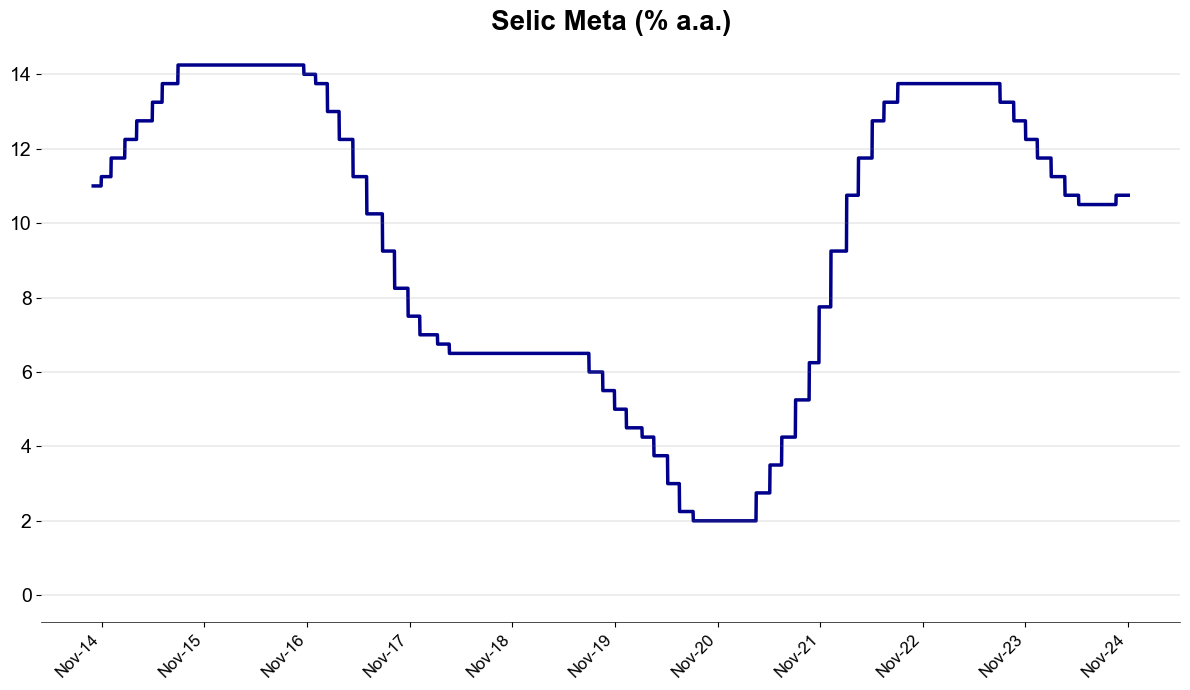

In [65]:
plt.figure(figsize=(12, 7))
cor = '#00008B'

plt.plot(selic_meta.index, selic_meta['valor'], linestyle='-', color=cor, linewidth=2.5)

titulo_fonte = {'fontsize': 20, 'fontweight': 'bold', 'fontfamily': 'Arial', 'color': 'black'}
plt.title('Selic Meta (% a.a.)', fontdict=titulo_fonte)

# Configuração dos eixos
ax = plt.gca()

# Ajusta o rótulo e a fonte dos eixos X e Y
ax.set_xlabel('', fontsize=10, fontweight='bold', fontfamily='Arial')
ax.set_ylabel('', fontsize=10, fontweight='bold', fontfamily='Arial')

# Ajusta o tamanho da fonte dos ticks dos eixos X e Y
ax.tick_params(axis='x', labelsize=12, labelcolor='black', labelrotation=45)  
ax.tick_params(axis='y', labelsize=14, labelcolor='black')  

# Remove todas as bordas do gráfico e mantém apenas a linha do eixo X
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)  
ax.spines['left'].set_visible(False)  
ax.spines['bottom'].set_linewidth(0.5)  

# Filtragem das datas para pegar o primeiro dia de novembro de cada ano
november_first_dates = []
for year in selic_meta.index.year.unique():
    november_dates = selic_meta.index[(selic_meta.index.year == year) & (selic_meta.index.month == 11)]
    if len(november_dates) > 0:
        november_first_dates.append(november_dates[0])  # Pega o primeiro dia de novembro de cada ano

november_first_dates = pd.to_datetime(november_first_dates)

# Define os rótulos para o mês de novembro, formatando-os como "nov-yy"
november_labels = [date.strftime('%b-%y') for date in november_first_dates]

# Define os ticks do eixo X (somente para os primeiros dias de novembro de cada ano)
ax.set_xticks(november_first_dates)  
ax.set_xticklabels(november_labels, rotation=45, ha='right', fontsize=12)

ax.grid(False)

# Adiciona a linha horizontal do eixo X
ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.2)

# Adiciona as linhas horizontais
for y in [ 2, 4, 6, 8, 10, 12, 14]:
    ax.add_line(mlines.Line2D(xdata=ax.get_xlim(), ydata=[y, y], color='gray', linestyle='-', linewidth=0.2))

plt.tight_layout()
plt.show()

### IPCA em 12 meses

O Índice de Preços ao Consumidor Amplo (IPCA) é o principal indicador da inflação no Brasil. Ele mede a variação dos preços de produtos e serviços consumidos pelas famílias, refletindo a perda do poder de compra da moeda ao longo do tempo. Os dados são coletados em diferentes regiões do país e comparados com os preços do mês anterior. O IPCA é amplamente utilizado para indexar contratos, calcular reajustes, e determinar os pagamentos de juros de determinados títulos públicos e privados, como o Tesouro IPCA+, que oferece uma taxa prefixada somada à variação do índice.   

In [59]:
ipca_br = obter_serie_bcb(13522, '01/10/2014', '01/11/2024')
print(ipca_br)

            valor
data             
2014-10-01   6.59
2014-11-01   6.56
2014-12-01   6.41
2015-01-01   7.14
2015-02-01   7.70
...           ...
2024-06-01   4.23
2024-07-01   4.50
2024-08-01   4.24
2024-09-01   4.42
2024-10-01   4.76

[121 rows x 1 columns]


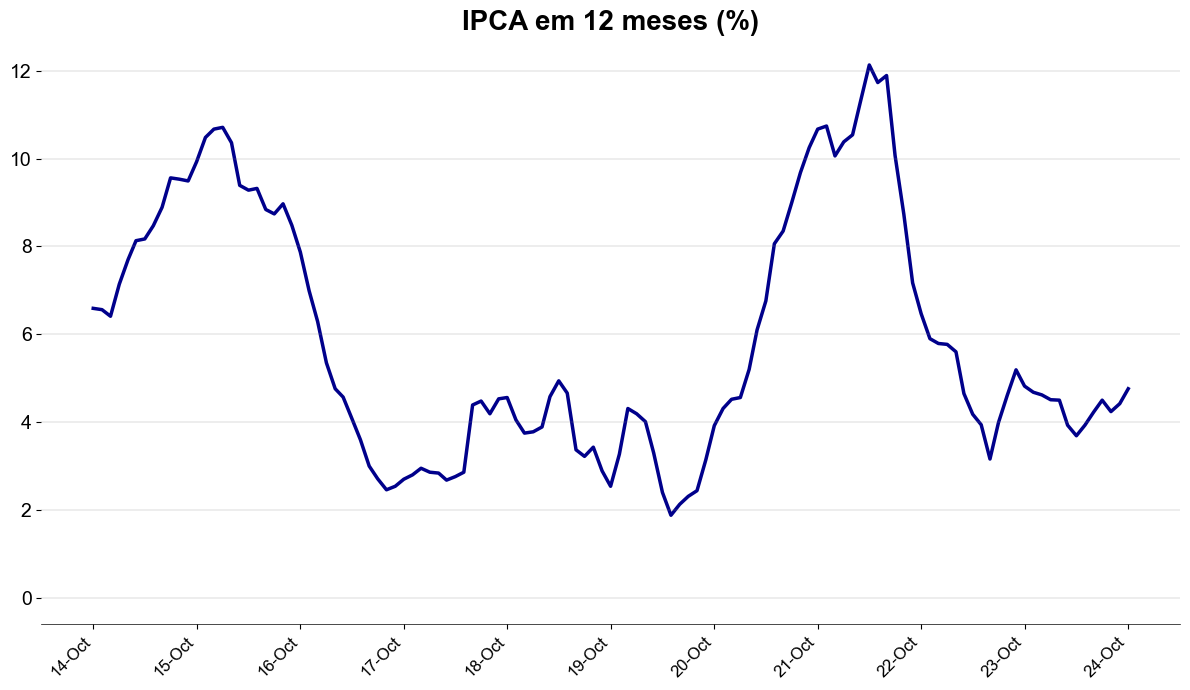

In [66]:
plt.figure(figsize=(12, 7))
cor = '#00008B'

plt.plot(ipca_br.index, ipca_br['valor'], linestyle='-', color=cor, linewidth=2.5)

titulo_fonte = {'fontsize': 20, 'fontweight': 'bold', 'fontfamily': 'Arial', 'color': 'black'}
plt.title('IPCA em 12 meses (%)', fontdict=titulo_fonte)

# Configuração dos eixos
ax = plt.gca()

# Ajusta o rótulo e a fonte dos eixos X e Y
ax.set_xlabel('', fontsize=8, fontweight='bold', fontfamily='Arial')
ax.set_ylabel('', fontsize=8, fontweight='bold', fontfamily='Arial')

# Ajusta o tamanho da fonte dos ticks dos eixos X e Y
ax.tick_params(axis='x', labelsize=12, labelcolor='black', labelrotation=45)  # Ajusta os ticks do eixo X
ax.tick_params(axis='y', labelsize=14, labelcolor='black')  # Ajusta os ticks do eixo Y

# Configura o eixo X para exibir rótulos todo ano no mês de Outubro
oct_dates = ipca_br.index[ipca_br.index.month == 10]
oct_labels = [date.strftime('%y-%b') for date in oct_dates]

# Define os rótulos para o mês de Outubro
ax.set_xticks(oct_dates)  
ax.set_xticklabels(oct_labels, rotation=45, ha='right', fontsize=12)  

# Remove todas as bordas do gráfico e mantém apenas a linha do eixo X
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)  
ax.spines['left'].set_visible(False) 
ax.spines['bottom'].set_linewidth(0.5)  

ax.grid(False)

# Adiciona a linha horizontal do eixo X
ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.2)

# Adiciona as linhas horizontais
for y in [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]:
    ax.add_line(mlines.Line2D(xdata=ax.get_xlim(), ydata=[y, y], color='gray', linestyle='-', linewidth=0.2))

plt.tight_layout()
plt.show()

### IBC-Br

O Índice de Atividade Econômica do Banco Central (IBC-Br) é um indicador mensal que mede a atividade econômica nacional com foco nos três principais setores: agropecuária, indústria e serviços. Seu principal objetivo é auxiliar na formulação de políticas monetárias, contribuindo para a definição da taxa básica de juros. Além disso, o IBC-Br pode ser utilizado como uma prévia do Produto Interno Bruto (PIB), já que este é divulgado trimestralmente.

In [68]:
ibc_br = obter_serie_bcb(24363, '01/10/2019', '01/11/2024')
print(ibc_br)

             valor
data              
2019-10-01  142.99
2019-11-01  138.99
2019-12-01  137.54
2020-01-01  133.97
2020-02-01  134.42
2020-03-01  136.13
2020-04-01  118.61
2020-05-01  119.64
2020-06-01  125.92
2020-07-01  135.83
2020-08-01  135.53
2020-09-01  136.94
2020-10-01  139.68
2020-11-01  138.03
2020-12-01  139.18
2021-01-01  131.08
2021-02-01  134.10
2021-03-01  144.46
2021-04-01  139.01
2021-05-01  137.40
2021-06-01  137.58
2021-07-01  142.79
2021-08-01  141.74
2021-09-01  138.54
2021-10-01  137.80
2021-11-01  139.54
2021-12-01  141.49
2022-01-01  131.50
2022-02-01  136.68
2022-03-01  149.55
2022-04-01  143.21
2022-05-01  142.64
2022-06-01  141.85
2022-07-01  148.75
2022-08-01  149.33
2022-09-01  144.35
2022-10-01  142.70
2022-11-01  141.06
2022-12-01  142.39
2023-01-01  136.10
2023-02-01  141.04
2023-03-01  158.46
2023-04-01  148.82
2023-05-01  146.91
2023-06-01  145.70
2023-07-01  150.38
2023-08-01  151.54
2023-09-01  145.21
2023-10-01  145.34
2023-11-01  144.70
2023-12-01  

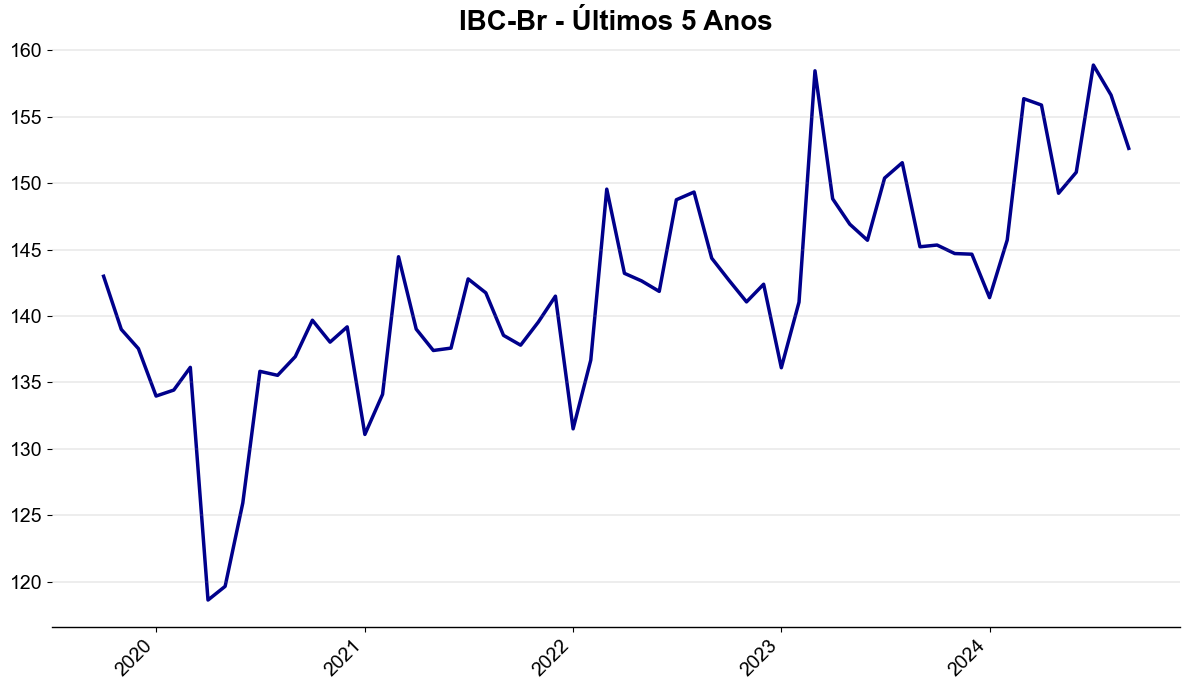

In [72]:
plt.figure(figsize=(12, 7))
cor = '#00008B'
plt.plot(ibc_br.index, ibc_br['valor'], linestyle='-', color=cor, linewidth=2.5)

titulo_fonte = {'fontsize': 20, 'fontweight': 'bold', 'fontfamily': 'Arial', 'color': 'black'}
plt.title('IBC-Br - Últimos 5 Anos', fontdict=titulo_fonte)

plt.xlabel('', fontsize=12, fontweight='bold', fontfamily='Arial')
plt.ylabel('', fontsize=14, fontweight='bold', fontfamily='Arial')

plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

ax = plt.gca()

ax.xaxis.set_major_locator(mdates.YearLocator())  # Marca cada ano
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formata para mostrar o ano

ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)  
ax.spines['left'].set_visible(False)  
ax.spines['bottom'].set_linewidth(1.0)  

ax.grid(False)

for y in [120, 125, 130, 135, 140, 145, 150, 155, 160]:
    ax.add_line(mlines.Line2D(xdata=ax.get_xlim(), ydata=[y, y], color='gray', linestyle='-', linewidth=0.2))

plt.tight_layout()
plt.show()